<a href="https://colab.research.google.com/github/aebrahimi66/titap_mystry/blob/master/cat_versus_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path),
    valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)
learn = cnn_learner(dls, resnet34, metrics= error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.168086,0.038314,0.009472,35:57


epoch,train_loss,valid_loss,error_rate,time
0,0.065422,0.033605,0.010149,52:12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from ipywidgets import *
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

Is this a cat?: False.
Probability it's a cat: 0.001184


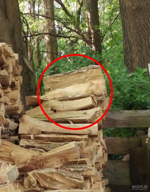

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
img.to_thumb(192)
